In [31]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline

# https://blog.datadive.net/monotonicity-constraints-in-machine-learning/ 

In [138]:
dff = pd.read_csv('data/DR_Demo_10K_Lending_Club_Loans_train.csv').fillna(0)
df = dff.sample(100)
df = dff

df_nums = df.select_dtypes(include=[np.number]).fillna(0)

print(df.columns)
print(df_nums.columns)

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mths_since_last_major_derog', 'policy_code',
       'is_bad'],
      dtype='object')
Index(['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mths_since_last_major_derog', 'policy_code',
       'is_bad'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


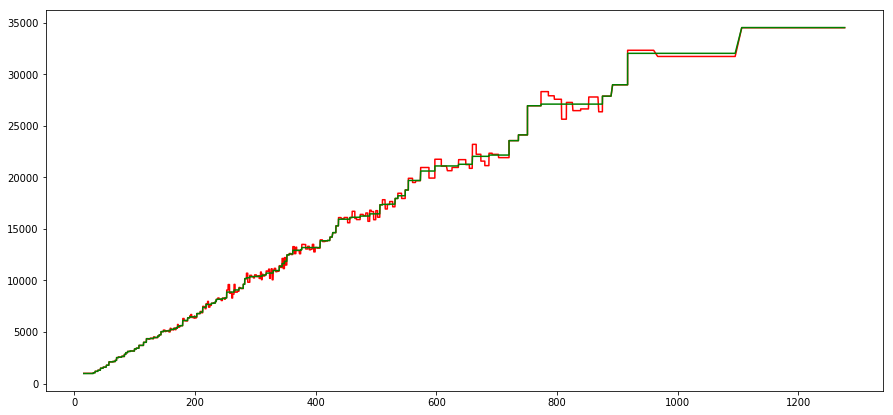

In [136]:
y = df['annual_inc']
x = df['int_rate']
x = x.str.replace('%','').astype('float')

y = df['funded_amnt']
x = df['installment']

y_col = 'funded_amnt'
x_col = 'installment'

df = df[[x_col, y_col]].sort_values(x_col)
x = df[x_col]
y = df[y_col]

overfit_model = lgb.LGBMRegressor(silent=False, min_child_samples=5)
overfit_model.fit(x.reshape(-1,1), y)
pred_of = overfit_model.predict(x.reshape(-1,1))

monotone_model = lgb.LGBMRegressor(min_child_samples=5, monotone_constraints="1")
monotone_model.fit(x.reshape(-1,1), y)
pred_m = monotone_model.predict(x.reshape(-1,1))

fig, ax = plt.subplots(1,1,figsize=(15,7))
# plt.scatter(x,y)
plt.plot(x,pred_of, color='r')
plt.plot(x,pred_m, color='g')

In [127]:
import numpy as np
size = 100
x = np.linspace(0, 10, size) 
y = x**2 + 10 - (20 * np.random.random(size))

overfit_model = lgb.LGBMRegressor(silent=False, min_child_samples=5)
overfit_model.fit(x.reshape(-1,1), y)
pred_of = overfit_model.predict(x.reshape(-1,1))

monotone_model = lgb.LGBMRegressor(min_child_samples=5, monotone_constraints="1")
monotone_model.fit(x.reshape(-1,1), y)
pred_m = monotone_model.predict(x.reshape(-1,1))

from sklearn.metrics import mean_squared_error as mse
 
size = 1000000
xx = np.linspace(0, 10, size) 
yy = xx**2  -10 + (20 * np.random.random(size))
 
print ("Default model rmse", mse(yy, overfit_model.predict(xx.reshape(-1,1)))**.5 )
print ("Monotone model rmse", mse(yy, monotone_model.predict(xx.reshape(-1,1)))**.5 )


Default model rmse 6.558784635050342
Monotone model rmse 6.401085111151643


In [118]:
pred_of
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

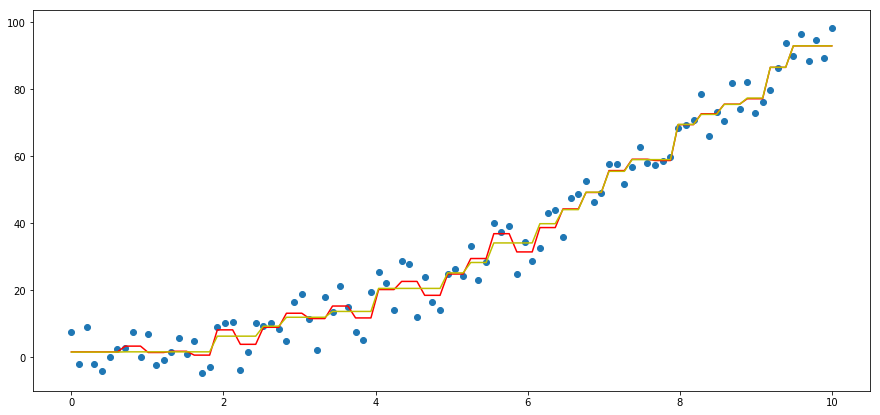

In [122]:
fig, ax = plt.subplots(1,1,figsize=(15,7))

plt.scatter(x,y)
plt.plot(x,pred_of, color='r')
plt.plot(x,pred_m, color='y')

In [59]:
# df.info()
df_nums = df.select_dtypes(include=[np.number]).fillna(0)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b528630>,
      dtype=object)

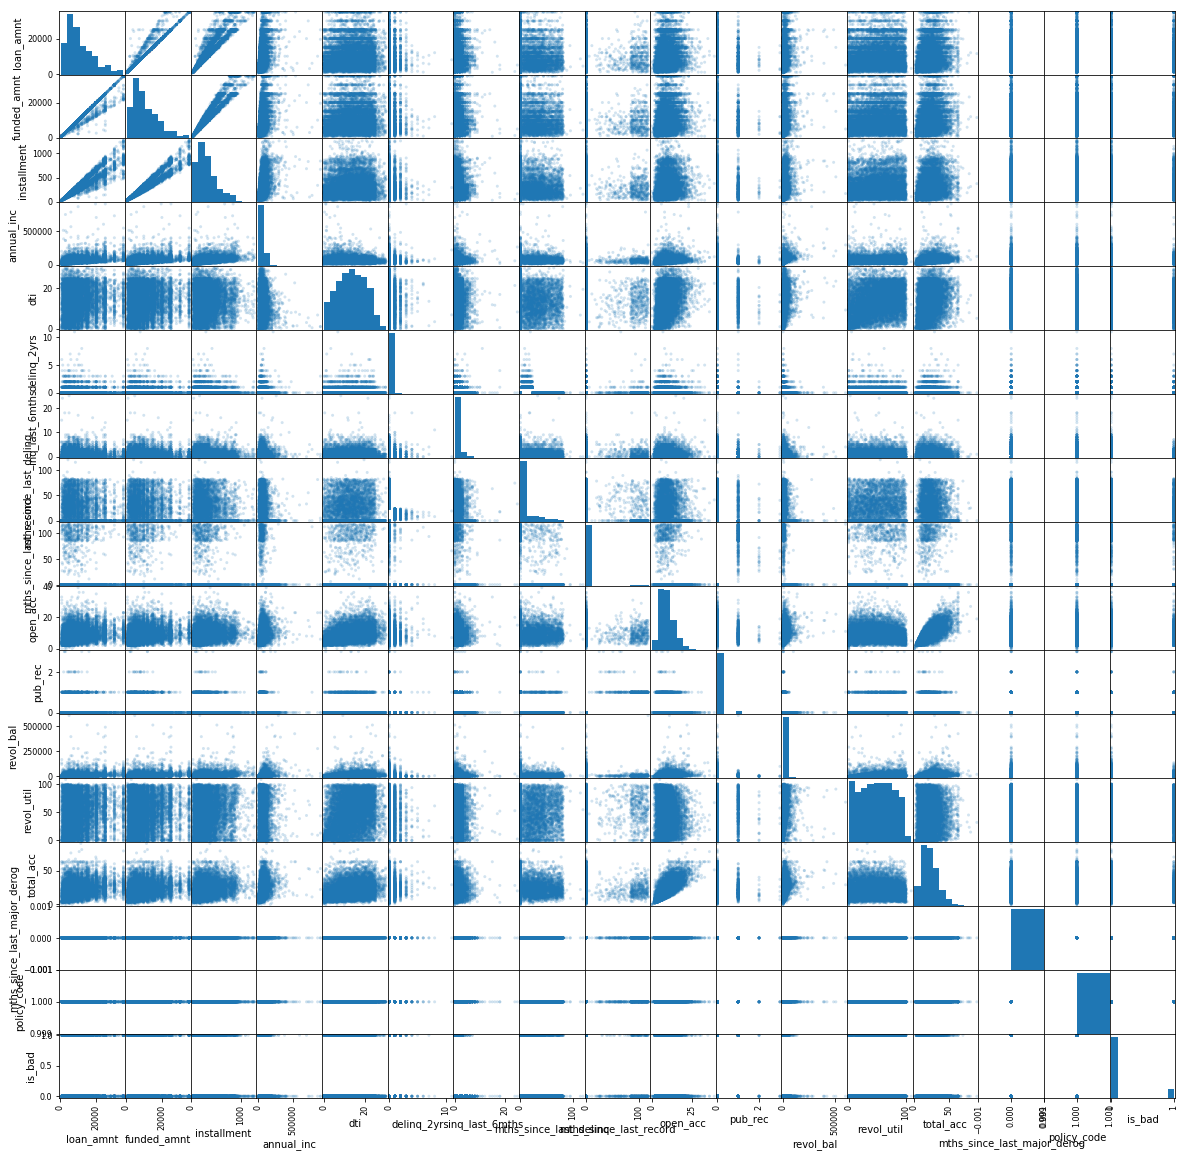

In [45]:
pd.plotting.scatter_matrix(df_nums, alpha=0.2, figsize=(20,20))